**Standard libraries for data analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

**Load the dataset**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Deep Learning/data.csv")

In [3]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


**EDA & Pre-processing**

In [4]:
df.shape

(50553, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Gender                14600 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [6]:
df["Gender"].unique()

array([nan, 'F', 'M'], dtype=object)

In [7]:
df["Claim"].unique()

array([0, 1])

**Feature target split**

In [8]:
X = df.drop("Claim",axis=1)
y = df["Claim"]

**Label encoding on target column**

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
y

array([0, 0, 0, ..., 0, 0, 0])

**Split categorical and numerical data**

In [11]:
df_num = X.select_dtypes(["int64","float64"])
df_cat = X.select_dtypes("object")

In [12]:
df_num.head()

,ID,Duration,Net Sales,Commision (in value),Age
0,3433,7,0.0,17.82,31
1,4339,85,69.0,0.00,36
2,34590,11,19.8,11.88,75
3,55816,16,20.0,0.00,32
4,13816,10,15.0,0.00,29


**Standard Scaler**:- A standard scaler converts a distribution, such that it has 0 mean and 1 standard deviation

In [13]:
for col in df_num:
  ss = StandardScaler()
  df_num[col] = ss.fit_transform(df_num[[col]])

In [14]:
df_num.head()

,ID,Duration,Net Sales,Commision (in value),Age
0,-1.544543,-0.418263,-0.834389,0.400903,-0.640165
1,-1.495003,0.350712,0.576677,-0.494132,-0.284961
2,0.159134,-0.378829,-0.429475,0.102558,2.485628
3,1.319781,-0.329535,-0.425385,-0.494132,-0.569124
4,-0.976797,-0.388687,-0.527636,-0.494132,-0.782247


In [15]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Gender
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA,NaN
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE,NaN
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA,NaN
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA,NaN
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF",NaN


**Categorical data plot**

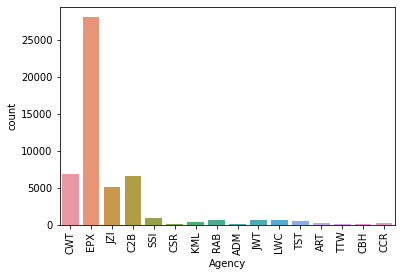

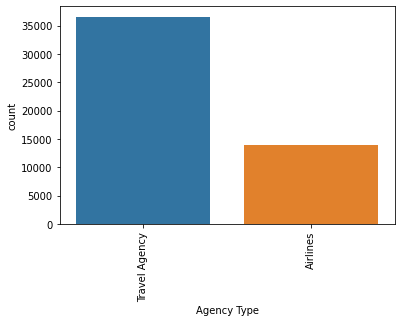

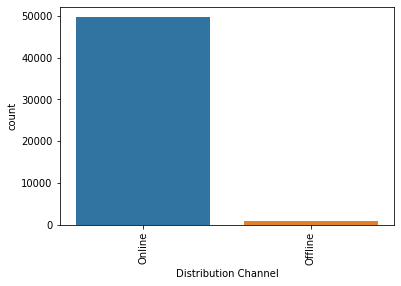

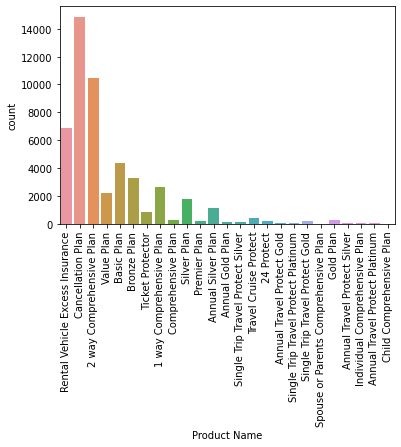

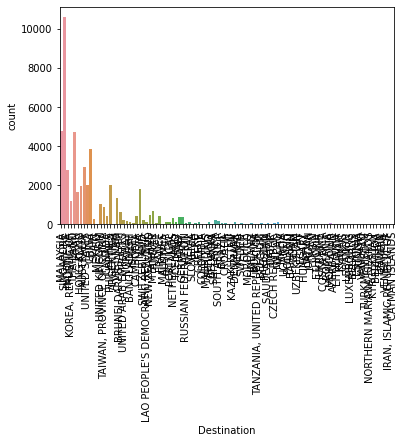

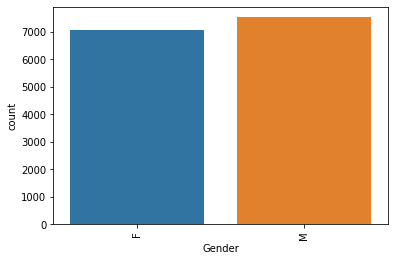

In [16]:
for col in df_cat:
  plt.figure()
  sns.countplot(data=df_cat, x=col)
  plt.xticks(rotation=90)
  plt.show()

**One hot encoding on categorical column**

In [17]:
df_cat = pd.get_dummies(df_cat)

In [18]:
df_cat.head()

,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,...,Destination_NEPAL,Destination_NETHERLANDS,Destination_NEW ZEALAND,Destination_NORTHERN MARIANA ISLANDS,Destination_NORWAY,Destination_OMAN,Destination_PAKISTAN,Destination_PERU,Destination_PHILIPPINES,Destination_POLAND,Destination_PORTUGAL,Destination_QATAR,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAUDI ARABIA,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA,Gender_F,Gender_M
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Combine both categorical and numerical data for trainning**

In [19]:
X = pd.concat([df_num, df_cat], axis=1)

In [20]:
X.head()

,ID,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,...,Destination_NEPAL,Destination_NETHERLANDS,Destination_NEW ZEALAND,Destination_NORTHERN MARIANA ISLANDS,Destination_NORWAY,Destination_OMAN,Destination_PAKISTAN,Destination_PERU,Destination_PHILIPPINES,Destination_POLAND,Destination_PORTUGAL,Destination_QATAR,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAUDI ARABIA,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA,Gender_F,Gender_M
0,-1.544543,-0.418263,-0.834389,0.400903,-0.640165,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.495003,0.350712,0.576677,-0.494132,-0.284961,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.159134,-0.378829,-0.429475,0.102558,2.485628,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.319781,-0.329535,-0.425385,-0.494132,-0.569124,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.976797,-0.388687,-0.527636,-0.494132,-0.782247,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Target Claim is highly imbalance**

Imbalance means that the number of data points available for different the classes is different:

If there are two classes, then balanced data would mean 50% points for each of the class.

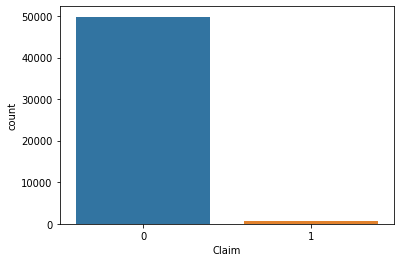

In [21]:
# visualize the target variable
g = sns.countplot(df['Claim'])
g.set_xticklabels([0,1])
plt.show()

In [22]:
# class count for 0 & 1
class_count_0, class_count_1 = df['Claim'].value_counts()

# Separate class
class_0 = df[df['Claim'] == 0]
class_1 = df[df['Claim'] == 1]

# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (49812, 12)
class 1: (741, 12)


total class of 1 and 0: 1    49812
0    49812
Name: Claim, dtype: int64


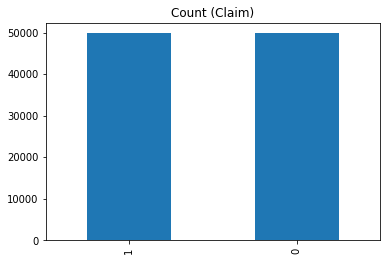

In [23]:
# oversampling for class 1
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['Claim'].value_counts())

# plot the count after under-sampeling
test_over['Claim'].value_counts().plot(kind='bar', title='Count (Claim)')

**Explanation:-**

class 0: 49812 data points    and     class 1: 741 data points

Number of class 1 are less and class 0 are so accuracy is very high. hence by using oversampling the ratio for class 1 & 0 becomes 50-50%.

total class of 1 and 0:

1  =  49812

0  =  49812

**Generate training and test dataset into training and test set with an 70%-30% ratio**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

**Random over-sampling with imblearn**

In [25]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape',(y))
print('Original dataset shape',(y_train_ros))


Original dataset shape [0 0 0 ... 0 0 0]
Original dataset shape [0 0 0 ... 1 1 1]


In [26]:
X_train_ros.shape

(69702, 154)

Libraries for Neural network


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

**Create model with binary classification**

**Input** = Input layer has multiple neurons, one for each feature
154 input and 16 neurons in each layer. 

**Hidden layer** = All the other layers in between input and ouput layer are the Hidden layers. 

**Drop-out layer** = 
Drop-out layer used for regularization.

**output layer** = Output layer can either have one neuron for regression and binary classification or multiple neurons, one for each class in case of multi-class classification.Sigmoid activation is used in this neural network

**Activation function** provides a non-linear output.here, relu is used because more layers present also it reduces vanishing gradient problem.
Types of activation functions:
1. linear activation = - infinity to + infinity 
2. tanh = -1 to +1
3. sigmoid = 0 to 1
4. softmax = multiclass
5. relu= 0 to n

In [28]:
# create neural nework

model = Sequential()
model.add(Dense(16, activation="relu", input_dim=154))
model.add(Dropout(0.5))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

**Optimizer** = Optimizers are algorithms used to change weights and learning rate to reduce the losses. ADAM optimizer used.

**Loss Function** =  to minimize the error loss function is used. 
Here, binary_crossentropy loss function is used.

In [29]:
model.compile(optimizer="adam", loss="binary_crossentropy")

**Early stopping** = Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

Here, it will monitor the loss function at 5 patience with minimum 0.01 delta 

In [30]:
early_stopping = EarlyStopping(monitor="loss", min_delta=0.01, patience=5)

**Batch size=** Batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

**epochs=** The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

**callbacks=** Callbacks provide a way to execute code and interact with the training model process automatically.


In [31]:
model.fit(X_train_ros,y_train_ros, batch_size=64, epochs=20,  callbacks=[early_stopping])

Epoch 1/20
1090/1090 [==============================] - 3s 2ms/step - loss: 0.6602
Epoch 2/20
1090/1090 [==============================] - 2s 2ms/step - loss: 0.6328
Epoch 3/20
1090/1090 [==============================] - 3s 3ms/step - loss: 0.6257
Epoch 4/20
1090/1090 [==============================] - 3s 2ms/step - loss: 0.6176
Epoch 5/20
1090/1090 [==============================] - 2s 2ms/step - loss: 0.6161
Epoch 6/20
1090/1090 [==============================] - 3s 2ms/step - loss: 0.6133
Epoch 7/20
1090/1090 [==============================] - 2s 2ms/step - loss: 0.6136
Epoch 8/20
1090/1090 [==============================] - 2s 2ms/step - loss: 0.6064
Epoch 9/20
1090/1090 [==============================] - 2s 2ms/step - loss: 0.6066
Epoch 10/20
1090/1090 [==============================] - 2s 2ms/step - loss: 0.6083
Epoch 11/20
1090/1090 [==============================] - 2s 2ms/step - loss: 0.6072
Epoch 12/20
1090/1090 [==============================] - 2s 2ms/step - loss: 0.6046
E

**Prediction**

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     14961
           1       0.06      0.56      0.10       205

    accuracy                           0.87     15166
   macro avg       0.52      0.72      0.52     15166
weighted avg       0.98      0.87      0.92     15166



In [35]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

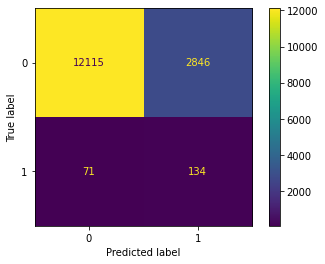

In [36]:
clf = SVC(random_state=1)
clf.fit(X_train_ros, y_train_ros)
SVC(random_state=1)
plot_confusion_matrix(clf, X_test, y_test) 
plt.show()

**Conclusion:**

Claim for insurance is highly imbalanced, which is balance by using random oversampling technique. For 0 recall value is 0.87 and for 1 its less 0.56. The accuracy for neural network is 87%. From confusion metrics we will understand who will predict for insurance claim.